In [1]:
#Import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.patches as mpatches

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Import API key
from config import gkey 

# Configure gmaps
gmaps.configure(api_key=gkey)

In [3]:
#read csv file 
pop2020_df = pd.read_csv("CleanedData/cleaned_population.csv")

## Analysis/Calculations for Pop Rate and Growth Rate

In [8]:
# loop- go through each row and calculate change in rate from 2018 to 2019 
pop2020_df["2018-2019 Population Rate"] = ''

for row in pop2020_df:
    rate_19 = ((pop2020_df['2019 Population']- pop2020_df['2018 Population'])/pop2020_df['2018 Population'])*100
    pop2020_df['2018-2019 Population Rate'] = rate_19  

#Sort by highest 2018-2019 pop rate
sorted_pop = pop2020_df.sort_values(by=['2018-2019 Population Rate'], ascending = False)    
sorted_pop

,City,State,2018 Population,2019 Population,2020 Population,2018-2019 Population Rate
153,Frisco,TX,188452,200490,"215,060",6.387834
162,McKinney,TX,191748,199177,"208,487",3.874356
143,Murfreesboro,TN,141442,146900,"151,066",3.858826
71,Port St. Lucie,FL,194808,201846,"206,410",3.612788
107,Henderson,NV,309518,320189,"330,084",3.447619
...,...,...,...,...,...,...
103,St. Louis,MO,303419,300576,"293,792",-0.936988
164,Pasadena,TX,152733,151227,"151,891",-0.986034
92,Shreveport,LA,189360,187112,"183,819",-1.187157
93,Baltimore,MD,602443,593490,"590,479",-1.486116


In [9]:
#convert 2020 population data type to int
sorted_pop = sorted_pop.replace(',','', regex=True)
sorted_pop['2020 Population'] = pd.to_numeric(sorted_pop['2020 Population'])
sorted_pop.dtypes

City                          object
State                         object
2018 Population                int64
2019 Population                int64
2020 Population                int64
2018-2019 Population Rate    float64
dtype: object

In [10]:
# loop- go through each row and calculate change in rate from 2019 to 2020
sorted_pop["2019-2020 Population Rate"] = ''

for row in sorted_pop:
    rate_20 = ((sorted_pop['2020 Population']- sorted_pop['2019 Population'])/sorted_pop['2019 Population'])*100
    sorted_pop['2019-2020 Population Rate'] = rate_20
sorted_pop2 = sorted_pop.sort_values(by=['2019-2020 Population Rate'], ascending = False)
sorted_pop2

,City,State,2018 Population,2019 Population,2020 Population,2018-2019 Population Rate,2019-2020 Population Rate
153,Frisco,TX,188452,200490,215060,6.387834,7.267195
168,Salt Lake City,UT,200435,200567,213367,0.065857,6.381907
27,Irvine,CA,281732,287401,303956,2.012196,5.760244
162,McKinney,TX,191748,199177,208487,3.874356,4.674234
175,Bellevue,WA,147064,148164,154647,0.747974,4.375557
...,...,...,...,...,...,...,...
92,Shreveport,LA,189360,187112,183819,-1.187157,-1.759909
136,Pittsburgh,PA,300570,300286,294860,-0.094487,-1.806944
103,St. Louis,MO,303419,300576,293792,-0.936988,-2.257000
121,Fayetteville,NC,210748,211657,205646,0.431321,-2.839972


In [12]:
# loop- go through each row and calculate change in growth rate from 2018 to 2020
sorted_pop2['Diff in Pop Rate 2018-2020'] = ''
for row in sorted_pop:
    diff_rate = (sorted_pop['2019-2020 Population Rate']- sorted_pop['2018-2019 Population Rate'])
    sorted_pop2['Diff in Pop Rate 2018-2020'] = diff_rate
sorted_pop_final = sorted_pop2.sort_values(by=['Diff in Pop Rate 2018-2020'], ascending = False)

#Export to file
sorted_pop_final.to_csv("CsvFiles/sorted_population_final.csv")
sorted_pop_final           

,City,State,2018 Population,2019 Population,2020 Population,2018-2019 Population Rate,2019-2020 Population Rate,Diff in Pop Rate 2018-2020
168,Salt Lake City,UT,200435,200567,213367,0.065857,6.381907,6.316051
64,Hialeah,FL,234941,233339,243208,-0.681873,4.229469,4.911342
111,Jersey City,NJ,263851,262075,271099,-0.673107,3.443289,4.116396
27,Irvine,CA,281732,287401,303956,2.012196,5.760244,3.748048
169,Alexandria,VA,159069,159428,165748,0.225688,3.964172,3.738484
...,...,...,...,...,...,...,...,...
10,Surprise,AZ,137717,141664,142049,2.866022,0.271770,-2.594253
11,Tempe,AZ,191746,195805,194218,2.116863,-0.810500,-2.927363
121,Fayetteville,NC,210748,211657,205646,0.431321,-2.839972,-3.271293
163,Midland,TX,142173,146038,145012,2.718519,-0.702557,-3.421076


## Creating tables with top and bottom 20 lists of cities for population rate 2018-2019, 2019-2020 and growth rate 2018-2020

In [22]:
#finding the 20 cities with the highest population rate
top1819 = sorted_pop2.nlargest(20, '2018-2019 Population Rate')
toprate = sorted_pop2.nlargest(20, '2019-2020 Population Rate')
top1819.to_csv("CsvFiles/mostchangedpop18-19.csv")
toprate.to_csv("CsvFiles/mostchangedpop19-20.csv")

#finding the 20 cities with the highest growth rate
max_rate_change = sorted_pop_final.nlargest(20, 'Diff in Pop Rate 2018-2020')
max_rate_change.to_csv("CsvFiles/highest_growth18-20.csv")


In [23]:
#finding the 20 cities with the lowest population rate 
bottom1819=sorted_pop2.nsmallest(20, '2018-2019 Population Rate')
bottomrate=sorted_pop2.nsmallest(20, '2019-2020 Population Rate')
bottom1819.to_csv("CsvFiles/leastchangedpop18-19.csv")
bottomrate.to_csv("CsvFiles/leastchangedpop19-20.csv")

#finding the 20 cities with the highest growth rate
least_rate_change = sorted_pop_final.nsmallest(20, 'Diff in Pop Rate 2018-2020')
least_rate_change.to_csv("CsvFiles/lowest_growth18-20.csv")

## Bar graphs for top and bottom cities 

In [24]:
# Concatenating city and state for plotting
top1819['City, State']= ''
city_state = top1819['City'].map(str)+', ' + top1819['State'].map(str)
top1819['City, State'] = city_state

toprate['City, State']= ''
city_state = toprate['City'].map(str)+', ' + toprate['State'].map(str)
toprate['City, State'] = city_state

bottom1819['City, State']= ''
city_state = bottom1819['City'].map(str)+', ' + bottom1819['State'].map(str)
bottom1819['City, State'] = city_state

bottomrate['City, State']= ''
city_state = bottomrate['City'].map(str)+', ' + bottomrate['State'].map(str)
bottomrate['City, State'] = city_state

max_rate_change['City, State']= ''
city_state = max_rate_change['City'].map(str)+', ' + max_rate_change['State'].map(str)
max_rate_change['City, State'] = city_state

least_rate_change['City, State']= ''
city_state = least_rate_change['City'].map(str)+', ' + least_rate_change['State'].map(str)
least_rate_change['City, State'] = city_state

In [25]:
#Sort so that largest appears first
top1819 = top1819.sort_values(['2018-2019 Population Rate'])
toprate = toprate.sort_values(['2019-2020 Population Rate'])
bottom1819 = bottom1819.sort_values(['2018-2019 Population Rate'])
bottomrate = bottomrate.sort_values(['2019-2020 Population Rate'])

<IPython.core.display.Javascript object>


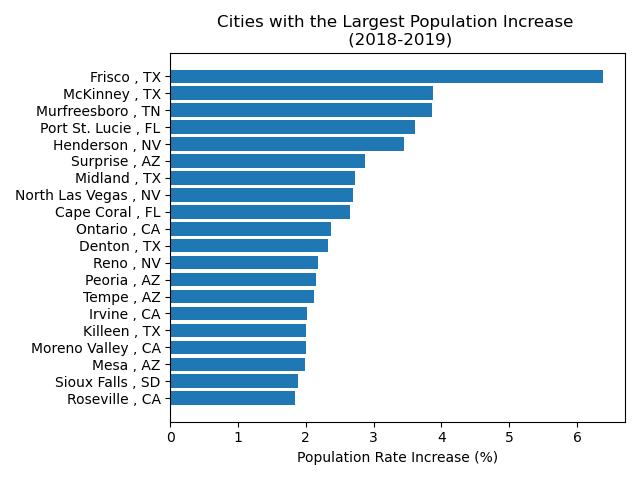

In [26]:
#Bar graph of top 20 cities 2018-2019
%matplotlib notebook
fig, ax=plt.subplots(1)
popTR1819 = top1819["2018-2019 Population Rate"]
x_axis = np.arange(top1819["City, State"].nunique())
plt.barh(x_axis, popTR1819)
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, list(top1819["City, State"]), rotation='horizontal')
plt.title("Cities with the Largest Population Increase \n (2018-2019)")
plt.xlabel("Population Rate Increase (%)")
plt.tight_layout()
plt.savefig('Output/Q1Population Increase in 2018-2019.png')
plt.show()

<IPython.core.display.Javascript object>


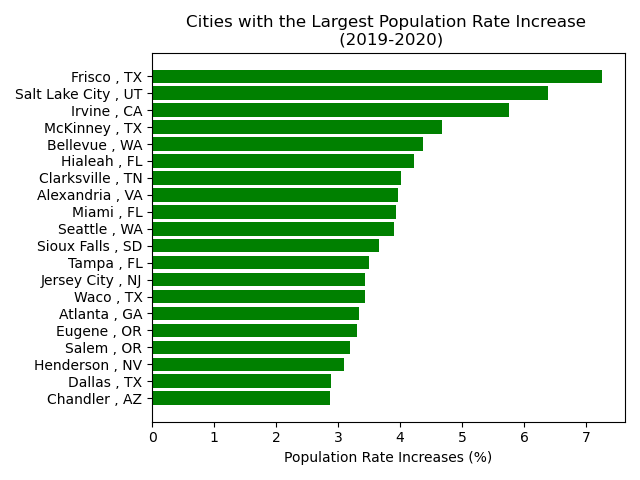

In [27]:
#Bar graph of top 20 cities 2019-2020
%matplotlib notebook
fig, ax=plt.subplots(1)
popTR1920 = toprate["2019-2020 Population Rate"]
x_axis = np.arange(toprate["City, State"].nunique())
plt.barh(x_axis, popTR1920,color="green")
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, list(toprate["City, State"]), rotation='horizontal')
plt.title("Cities with the Largest Population Rate Increase \n (2019-2020)")
plt.xlabel("Population Rate Increases (%)")
plt.tight_layout()
plt.savefig('Output/Q1Population Rate Increase in 2019-2020.png')
plt.show()

<IPython.core.display.Javascript object>


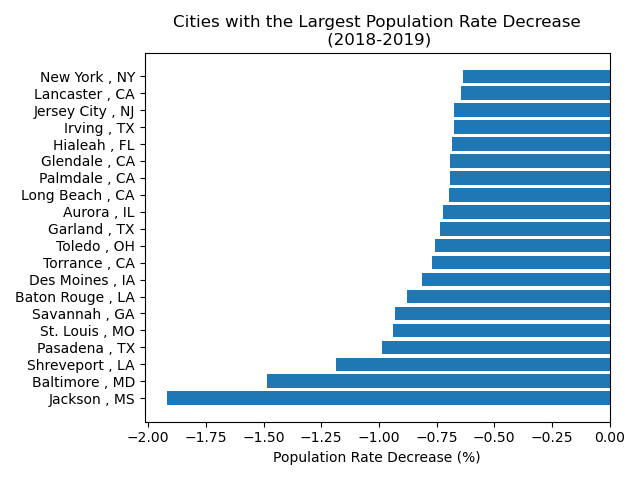

In [28]:
#Bar graph of bottom 20 cities 2018-2019
%matplotlib notebook
fig, ax=plt.subplots(1)
popBR1819 = bottom1819["2018-2019 Population Rate"]
x_axis = np.arange(bottom1819["City, State"].nunique())
plt.barh(x_axis, popBR1819)
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, list(bottom1819["City, State"]),rotation='horizontal')
plt.title("Cities with the Largest Population Rate Decrease\n (2018-2019)")
plt.xlabel("Population Rate Decrease (%)")
plt.tight_layout()
plt.savefig('Output/Q1Population Rate Decrease in 2018-2019.png')
plt.show()

<IPython.core.display.Javascript object>


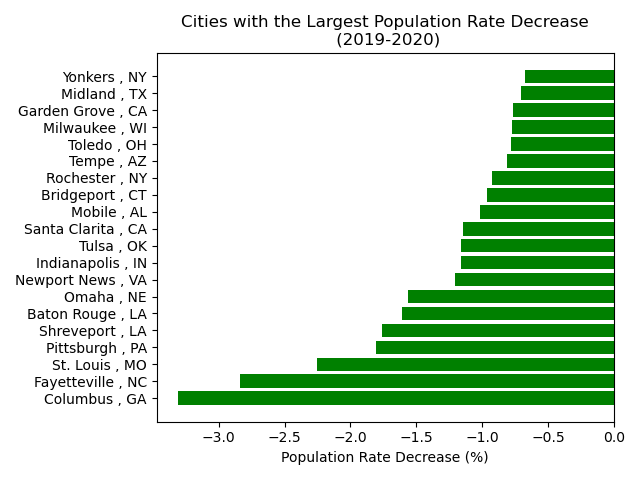

In [29]:
#Bar graph of bottom 20 cities 2019-2020
%matplotlib notebook
fig, ax=plt.subplots(1)
popBR1920 = bottomrate["2019-2020 Population Rate"]
x_axis = np.arange(bottomrate["City, State"].nunique())
plt.barh(x_axis, popBR1920, color="green")
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, list(bottomrate["City, State"]), rotation='horizontal')
plt.title("Cities with the Largest Population Rate Decrease\n (2019-2020)")
plt.xlabel("Population Rate Decrease (%)")
plt.tight_layout()
plt.savefig('Output/Q1Population Rate Decrease in 2019-2020.png')
plt.show()

<IPython.core.display.Javascript object>


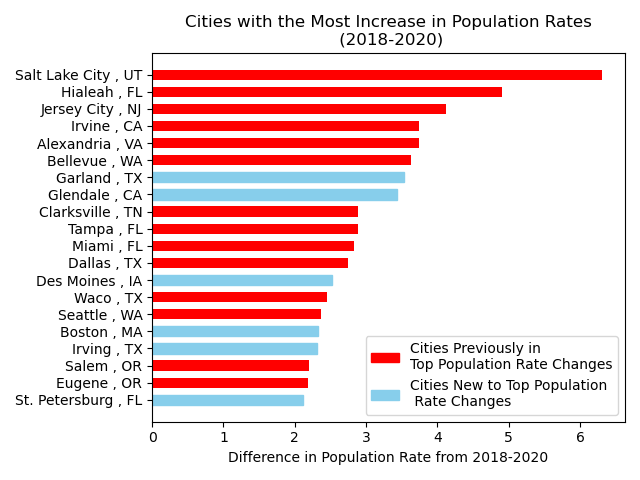

In [29]:
#Cities with most increase pop rate 2018-2020
fig, ax=plt.subplots(1)
max_rate_change = max_rate_change.sort_values(['Diff in Pop Rate 2018-2020'])
barWidth=0.6
pop1 = max_rate_change["Diff in Pop Rate 2018-2020"]
x_axis = np.arange(max_rate_change["City, State"].nunique())
diff = plt.barh(x_axis, pop1, color="red",height=barWidth)
diff[7].set_color('skyblue')
diff[0].set_color('skyblue')
diff[3].set_color('skyblue')
diff[4].set_color('skyblue')
diff[13].set_color('skyblue')
diff[12].set_color('skyblue')
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, list(max_rate_change["City, State"]), rotation='horizontal')
plt.title("Cities with the Most Increase in Population Rates\n (2018-2020)")
plt.xlabel("Difference in Population Rate from 2018-2020")
red_patch = mpatches.Patch(color='red', label='Cities Previously in \nTop Population Rate Changes')
skyblue_patch = mpatches.Patch(color='skyblue', label='Cities New to Top Population \n Rate Changes')
plt.legend(handles=[red_patch,skyblue_patch], loc =4)
plt.tight_layout()
plt.savefig('Output/Q1Highest Demand Cities 2018-2020.png')
plt.show()

<IPython.core.display.Javascript object>


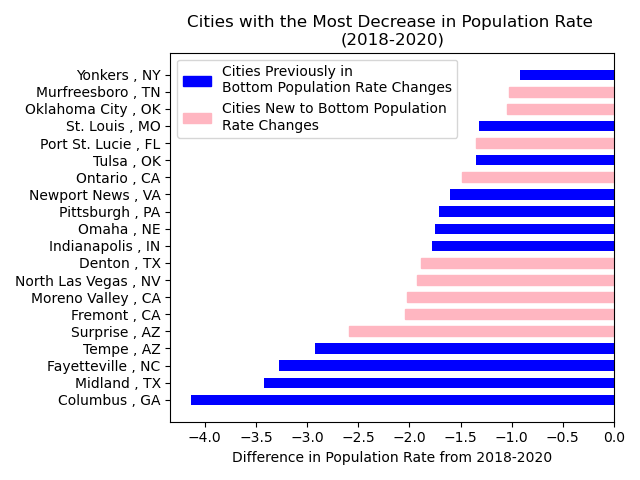

In [30]:
#Cities with most decrease pop rate 2018-2020
fig, ax=plt.subplots(1)
barWidth=0.6
pop2 = least_rate_change["Diff in Pop Rate 2018-2020"]
x_axis = np.arange(least_rate_change["City, State"].nunique())
diff = plt.barh(x_axis,pop2, color="blue", height=barWidth)
diff[18].set_color('lightpink')
diff[17].set_color('lightpink')
diff[4].set_color('lightpink')
diff[5].set_color('lightpink')
diff[6].set_color('lightpink')
diff[7].set_color('lightpink')
diff[8].set_color('lightpink')
diff[15].set_color('lightpink')
diff[13].set_color('lightpink')
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, list(least_rate_change["City, State"]), rotation='horizontal')
plt.title("Cities with the Most Decrease in Population Rate \n(2018-2020)")
plt.xlabel("Difference in Population Rate from 2018-2020")
blue_patch = mpatches.Patch(color='blue', label='Cities Previously in \nBottom Population Rate Changes')
lightpink_patch = mpatches.Patch(color='lightpink', label='Cities New to Bottom Population \nRate Changes')
plt.legend(handles=[blue_patch,lightpink_patch])
plt.tight_layout()
plt.savefig('Output/Q1Lowest Demand Cities 2018-2020.png')
plt.show()

## Creating heatmaps for positive growth rate cities in time frame 2018-2020 

In [ ]:
pull = ["City", "State", "Diff in Pop Rate 2018-2020"]
pull_pop = population_df[pull]
pull_pop

# Add columns for lat, lng
pull_pop['Lat'] = ""
pull_pop['Lng'] = ""

In [ ]:
#creating a function to get coordinates 
def getlatlng(params): 
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    response = requests.get(base_url, params=params)
    data = response.json()
    lat = data['results'][0]['geometry']['location']['lat']
    lng = data['results'][0]['geometry']['location']['lng']
    return lat, lng

In [ ]:
#loop to get lat,lng for each city 
for index, row in pull_pop.iterrows():
    print(f'working on {index} row')
    params = {
            "key": gkey,
            'address' : row['City'] + ',' + row['State']
             }
    lat, lng = getlatlng(params)
    try:
        pull_pop.loc[index,"Lat"] = lat
        pull_pop.loc[index,"Lng"] = lng
    except:
        print(f"missing value for row number{index}")

In [ ]:
#only pull positive growth rate in population from 2018-2020 to show where demand is increasing 
positive_pop=pull_pop.iloc[:123,:]
locations = positive_pop[['Lat','Lng']]
weight = positive_pop['Diff in Pop Rate 2018-2020']*100

In [ ]:
# Customize the size of the figure
figure_layout = {
    'width': '1000px',
    'height': '450px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig= gmaps.figure(layout=figure_layout, zoom_level = 3.8, center = (37.09,-95.71))

# Add Heatmap layer to map that displays pop rate% change for every city in dataset
heat_layer = gmaps.heatmap_layer(locations, weights=weight, 
                                 dissipating=False, max_intensity=150,
                                 point_radius = 1)
fig.add_layer(heat_layer)
fig